## Overview

The framework of interacting particle systems is ideally suited to **investigate the consequences of the inclusion of a spatial structure in the form of stochastic and local interactions**.

In these models, members of the population (particles) such as cells, plants, agents, or players are traditionally located on the
set of vertices of the d-dimensional integer lattice, but this can be extended to more general graphs. The dynamics is dictated by the geometry of the graph as particles can only interact with their neighbors, thus modeling an explicit spatial structure.

The main objective of research in the field of interacting particle systems is to **deduce the macroscopic behavior of the system and the emergence of spatial patterns from the microscopic rules described by the local interactions**.

## General Framework

From a mathematical point of view, an interacting particle system is a continuoustime Markov chain with a state at time t that is the function

$$
\xi_{t}: \mathbb{Z}^{d} \rightarrow\{0,1, \ldots, \kappa-1\}
$$

In the terminology of interacting particle system,

- Elements $x \in \mathbb{Z}^{d}$ are called sites or, using the terminology of graph theory, **vertices**, and have to be thought of as spatial locations.

- Elements $i \in\{0,1, \ldots, \kappa-1\}$ are called **types** or **colors**, e.g., in population dynamics, the types can be empty and occupied; in disease dynamics, healthy and infected; in opinion dynamics, Democrat and Republican, and so on.

- The state of the process at a given time is called a **spatial configuration.**

- We have $\xi_{t}(x)=$ type of vertex $x$ at time $t$

The dynamics of an interacting particle system cannot be described by an intensity matrix as the cardinality of the state space is not countable. Instead, the dynamics is described by local interactions indicating the **rate at which a vertex changes its type based on the state of the system in a neighborhood of the vertex**.

To define the dynamics, we let

$$
N_{x}=\left\{y \in \mathbb{Z}^{d}:\|x-y\|=1\right\} \quad \text { for all } \quad x \in \mathbb{Z}^{d}
$$

be the **interaction neighborhood** of vertex $x .$ Then, it is assumed that the type at vertex $x$ flips from type $i$ to type $j \neq i$ at a rate 

$$
\begin{aligned} \lim _{\varepsilon \downarrow 0} \varepsilon^{-1} P\left(\xi_{t+\varepsilon}(x)\right.&\left.=j | \xi_{t} \text { with } \xi_{t}(x)=i\right) \\ &=c_{i \rightarrow j}\left(x, \xi_{t}\right)=c_{i \rightarrow j}\left(\xi_{t}(y): y \in N_{x}\right) \end{aligned}
$$

that only depends on the configuration in the neighborhood of vertex x. The inclusion of a spatial structure can thus be divided into threw different levels:

1. No space (no interaction): branching process, simple birth and death process

2. Implicit space (global interaction): logistic growth process

3. Explicit space (local interaction)

## Invasion: the contact process

In the context of population dynamics, each site of the $d-$dimensional integer lattice is either empty or occupied by an individual and the evolution is described by the following rules:

- Independently of each other, individuals give birth to a single offspring at rate $\beta$ and die at the normalized rate one.

- At birth, the offspring is sent to one of the $2 d$ nearest neighbors of the parent's location chosen uniformly at random. If this target site is empty then it becomes occupied, otherwise the birth is suppressed.

*The number of individuals in a population evolving according to these rules is exactly the logistic growth process.* In particular, **the number of individuals in the contact process on the complete graph reduces to the logistic growth process.**

## Competition: the voter model

In the voter model, each site of the d-dimensional integer lattice is occupied by an individual that can be either of type 0 or of type 1. In this context, the evolution is described by the following simple rule:

- Independently of each other, individuals update their opinion at rate one by mimicking one of their $2 d$ nearest neighbors chosen uniformly at random.

- Individuals give birth independently at rate one to a single offspring that then replaces one of the parent's $2 d$ neighbors chosen uniformly at random.

- Each individual is of the same type as its parent.

The number of type 1 individuals in the voter model on the complete graph is closely related to the Moran model.

## Graphical representation

Looking at the d-dimensional integer lattice and adding one dimension for time, the graphical representation can be seen as a random graph in dimension d +1, that we typically call a percolation structure.

For concreteness, we now deal with the contact process. There are two types of events for this process: births and deaths. **To take care of the birth events, we attach 2d independent Poisson processes to each site, one for each neighbor, while
to take care of the death events, which are spontaneous, we only attach one Poisson process to each site:**

- $\left\{T_{n}(x, y): n \geq 1\right\}$ for $y \in N_{x}$ be the times of a rate $\beta / 2 d$ Poisson process,

- $\left\{U_{n}(x): n \geq 1\right\}$ for $x \in \mathbb{Z}^{d}$ be the times of a rate one Poisson process.

The graphical representation of the voter model is simpler because it only involves one type of events at each vertex. In this case, we attach $2d$ independent Poisson processes to each site by letting

$$
\left\{T_{n}(x, y): n \geq 1\right\} \text { for } y \in N_{x} \text { be the times of a rate } 1 / 2 d \text { Poisson process, }
$$

## Numerical simulations in finite volume

Here, we first give an algorithm to simulate the contact process on a finite grid with periodic boundary conditions. This algorithm relies on **the superposition and thinning properties of Poisson processes.**

1. When $-$ On the $N \times N$ lattice, the time of the first potential update is

$$
\begin{aligned} T &=\min \left\{T_{1}(x, y):(x, y) \in E\right\} \wedge \min \left\{U_{1}(x): x \in V\right\} \\ & \sim \text { Exponential }\left((\beta+1) N^{2}\right) \end{aligned}
$$

2. Where - since the total rate is the same at each vertex, each of the vertices is equally likely to be the one at which the first potential event occurs therefore we select a vertex uniformly at random:

$$
X \sim \text { Uniform }\{1,2, \ldots, N\}^{2}
$$

3. What - If site $X$ is empty, nothing happens and we go to (4). Otherwise, by the standard properties of the exponential distribution,

    - With probability $1 /(\beta+1),$ we kill the individual at vertex $X .$
    - With probability $\beta /(\beta+1),$ we choose one of the 2d neighbors of vertex $X$ uniformly at random and put a particle at this site if it is empty.
    
4. By memoryless of the exponential random variable, the characteristics of the next update are the same as for the first update so we can go back to (1).

The algorithm to simulate the voter model is simpler.

1. When $-$ On the $N \times N$ lattice, the time of the first potential update, i.e., the first time a symbol appears in the graphical representation, is now

$$
T=\min \left\{T_{1}(x, y):(x, y) \in E\right\} \sim \text { Exponential }\left(N^{2}\right)
$$

2. Where —As previously, the first potential update is at vertex

$$
X \sim \text { Uniform }\{1,2, \ldots, N\}^{2}
$$

3. What—We choose one of the four neighbors of vertex X uniformly at random and set the type at X equal to the type of this neighbor.

4. Again, by memoryless of the exponential random variable, we can go back to (1) to determine the time and location of the next update.

**Let's first implement the contact process on a 2D lattice**

In [1]:
import numpy as np
from numpy.random import choice
from scipy.stats import expon

def contact(n, n0, beta, T):
    N = n**2
    birth = beta/(1+beta)
    death = 1/(1+beta)
    nbs = [[-1,0],[1,0],[0,-1],[0,1]]
    rv = expon(scale=1/((beta+1)*N))
    universe = np.zeros(N,dtype=int)
    universe[choice(N,size=n0,replace=False)]=1
    universe = universe.reshape((n,n))
    tlst = [0]
    counts = {1:[n0],0:[N-n0]}
    while tlst[-1]<T:
        tlst.append(tlst[-1]+rv.rvs())
        x,y = choice(n,size=2,replace=True)
        if universe[x][y]==1:
            if choice([0,1],p=[death,birth]):
                b = choice(4)
                nbx = (x+nbs[b][0]+n)%n
                nby = (y+nbs[b][1]+n)%n
                if universe[nbx][nby]==0: #periodic boundary condition
                    universe[nbx][nby]=1
                    counts[0].append(counts[0][-1]-1)
                    counts[1].append(counts[1][-1]+1)
                else:
                    counts[0].append(counts[0][-1])
                    counts[1].append(counts[1][-1])
            else:
                universe[x][y]=0
                counts[0].append(counts[0][-1]+1)
                counts[1].append(counts[1][-1]-1)
        else:
            counts[0].append(counts[0][-1])
            counts[1].append(counts[1][-1])
                
    return tlst, counts, universe

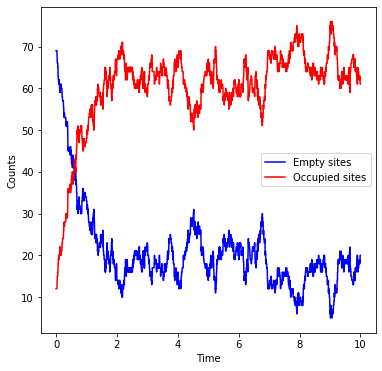

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]

universeSize=9
initNum=12
rate = 5
simTime = 10
Tlst,Cts, u = contact(universeSize, initNum, rate, simTime)
plt.plot(Tlst, Cts[0],'b-',label='Empty sites')
plt.plot(Tlst, Cts[1],'r-',label='Occupied sites')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()

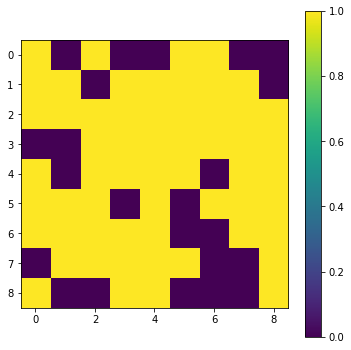

In [31]:
plt.imshow(u)
plt.colorbar()

**Now, let's implement the voter model, but we are trying to have 3 different opnions (0,1,2) competing here**

In [4]:
from collections import Counter

def voter(n,n1,n2,T):
    N = n**2
    init = choice(N,n1+n2,replace=False)
    universe = np.zeros(N,dtype=int)
    universe[init[:n1]]=1
    universe[init[n1:]]=2
    universe=universe.reshape((n,n))
    tlst = [0]
    cts = {0:[N-n1-n2],1:[n1],2:[n2]}
    rv = expon(scale=1/N)
    nbs = [[-1,0],[1,0],[0,-1],[0,1]]
    while tlst[-1]<T:
        tlst.append(tlst[-1]+rv.rvs())
        x,y = choice(n,size=2,replace=True)
        b = choice(4)
        nbx=(x+nbs[b][0]+n)%n
        nby=(y+nbs[b][1]+n)%n
        temp = Counter(universe.ravel().tolist())
        universe[nbx][nby]=universe[x][y]
        cts[0].append(temp[0])
        cts[1].append(temp[1])
        cts[2].append(temp[2])
    return tlst,cts,universe

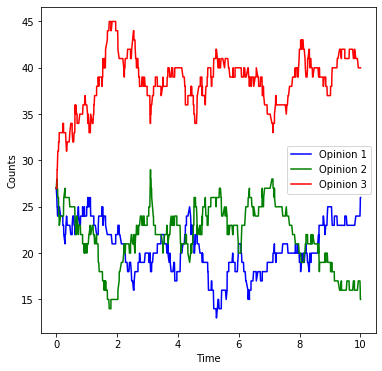

In [6]:
univeseSize = 9
num1 = 27
num2 = 27
Tscal = 10
Tlst,Cts,u=voter(universeSize,num1,num2,Tscal)
plt.plot(Tlst, Cts[0],'b-',label='Opinion 1')
plt.plot(Tlst, Cts[1],'g-',label='Opinion 2')
plt.plot(Tlst, Cts[2],'r-',label='Opinion 3')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()

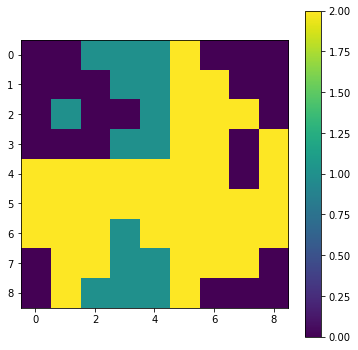

In [7]:
plt.imshow(u)
plt.colorbar()